<a href="https://colab.research.google.com/github/MostafaLabib6/Chess-Game/blob/main/KNN_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>K-Nearest Neighbours</b></h1></center>
<p>Welcome To Your First Task, today You'll be implementing your first ML algorithm</p>
<p>You'll build a KNN classifier from scratch to classify...you guessed it!</p>
<h3><i> Kozbara and Ba2dones</i> </h3>




---



#Import and Data read
Before Starting your implementation, we need to load our libraries and data first, <br>
we also display some graphs to get more insights on the data, you'll learn how to do that yourself in the upcoming sessions ;)

In [256]:
import numpy as np # for numerical operations
import pandas as pd # for handling input data
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization 
import timeit
plt.style.use('seaborn-darkgrid')

In [257]:
data = pd.read_csv('train.csv') # uses pandas library to open a .csv file
test = pd.read_csv('test.csv')

In [258]:
data.head() # displays the first 5 rows of data

,Plant Size,Plant Color,Leaf Thickness,label,label_text
0,22,70,65,1,Kozbara
1,34,61,71,1,Kozbara
2,48,41,65,1,Kozbara
3,73,69,6,0,Ba2dones
4,14,16,62,1,Kozbara


Notice that <i>label</i> and <i>label_text</i> are both the same thing, however since ML algorithms are mathematical models that can only work with numbers we will discard the column <i>label_text</i> after displaying the graphs.

In [259]:
test.head() # displays the first 5 rows of test data

,Plant Size,Plant Color,Leaf Thickness
0,42,51,97
1,88,62,7
2,85,94,14
3,95,88,7
4,46,17,84


Also notice that the test data doesn't contain the label columns because that'll be our job to predict their labels

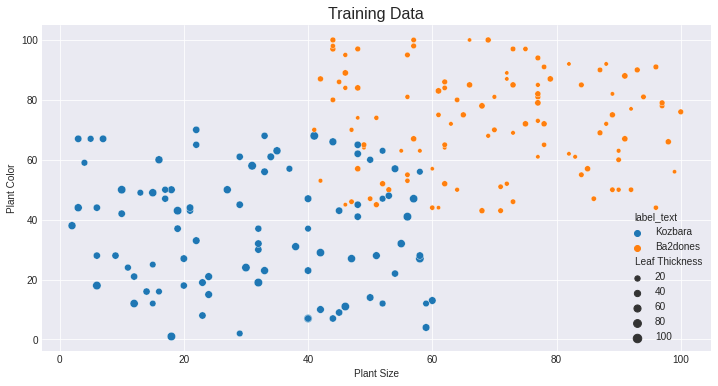

In [260]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Training Data',{'fontsize':16})
sns.scatterplot(data= data, x= 'Plant Size', y= 'Plant Color', hue= 'label_text', size='Leaf Thickness', ax=ax)
plt.show()

This is the <b>Training Set</b>
<font size=2, color=gray><i>(recall that the training set is the data that we already know it's type(kozbara/ba2dones))</i></font> and we'll be using it to predict the type of the unknown data

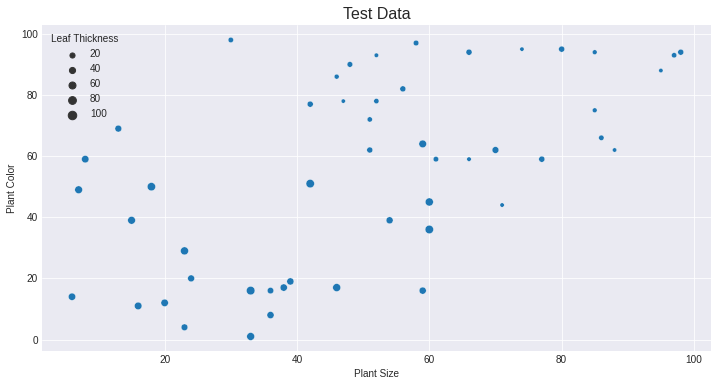

In [261]:
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Test Data',{'fontsize':16})
sns.scatterplot(data= test, x= 'Plant Size', y= 'Plant Color', size='Leaf Thickness')
plt.show()

This is the <b>Test Set</b>, a test set is data that we don't know it's type yet, we'll use our KNN classifier to predict their type, this is why they're all currently having the same color (no type)

In [262]:
data.drop(['label_text'], axis=1, inplace= True)


Finally before starting our implementation we're going to convert our data from a <i>Pandas DataFrame$^1$</i> to a <i>numpy array$^2$</i>
<br><br>
<font size=3, color='gray'>
<b>$^1$ Pandas</b> dataframes are the data structures that contains the matrix of the data that we use, we usually use them in the process before the actual algorithm where we display the data or make graphs from it since <i>pandas</i> is more suitble for it
</font>

<font size=3, color='gray'>
<b>$^2$ Numpy</b> arrays however are more optimized for mathematical/matrix operations so they are preferred for use during the implementation of the algorithm
</font>

In [263]:
# Use the variables below when running your implementation
data_array = np.array(data)
test_array = np.array(test)
print(data_array)
print(test_array)

[[ 22  70  65   1]
 [ 34  61  71   1]
 [ 48  41  65   1]
 [ 73  69   6   0]
 [ 14  16  62   1]
 [ 77  81  30   0]
 [ 56  55  21   0]
 [ 96  91  27   0]
 [ 92  50  19   0]
 [ 87  69  29   0]
 [ 62  64   3   0]
 [ 72  89   1   0]
 [ 18  50  75   1]
 [ 42  87  33   0]
 [ 56  95  25   0]
 [ 86  47  20   0]
 [ 73  85  35   0]
 [ 90  63   8   0]
 [  3  44  85   1]
 [ 51  28  77   1]
 [ 78  91  21   0]
 [ 90  60  22   0]
 [ 40  47  73   1]
 [ 32  30  65   1]
 [ 52  47  50   1]
 [ 60  13  74   1]
 [ 47  46  21   0]
 [ 77  82  35   0]
 [ 44  97  33   0]
 [ 20  27  69   1]
 [ 75  97  18   0]
 [ 22  33  73   1]
 [ 40  37  49   1]
 [ 61  75  18   0]
 [ 72  87   3   0]
 [ 42  10  75   1]
 [ 46  89  40   0]
 [ 56  53  17   0]
 [ 46  95  12   0]
 [ 92  77   2   0]
 [ 77  79  40   0]
 [ 45  43  66   1]
 [ 48  74   2   0]
 [ 61  44   2   0]
 [ 53  50  29   0]
 [ 18   1  99   1]
 [ 73  46  22   0]
 [ 60  57   1   0]
 [ 62  84  21   0]
 [ 23  19  71   1]
 [ 79  87  38   0]
 [ 30  24  95   1]
 [ 62  52  3

---

<h1>KNN Algorithm</h1>
<h2>1- Load Data ✅</h2> 
<h2>2- For each unkown point:</h2>

1.   Calculate distance between <em>**unknown point**</em> and <em>known points</em>
2.   Sort Distances in ascending order
3. Select top *K* points
4. Check majority of labels of the top *K* points
5. Assign Label to the unknown point 

Feeling Lost?<br>
Don't worry, Start implementing the required functions below and try to figure out how each of them fits in the above algorithm.

<br>
and if you get stuck you can always ask us for <i><b>support</b></i> 😉
<br><br>
<h2>⭐⭐Challenge⭐⭐</h2>
Implement the algorithm using a total of 2 loops across all functions


#Functions to implement
<br>
Note: All the functions below take arguments, however it's left for you to figure out which arguments that each take

##Eucledian Distance
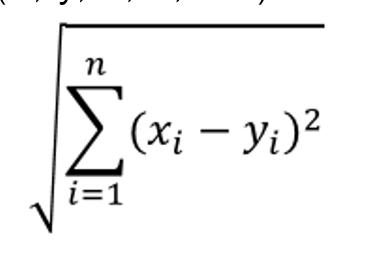

In [264]:
"""
  This function should return the distance between two data rows
  
"""
def eucledian_distance(pt1,pt2):
    dis=np.sqrt(np.sum((pt1-pt2)**2))
    return dis 
#a=np.array([1,2,3])
#b=np.array([4,5,6])
#print(eucledian_distance(a,b))  

In [265]:
from numpy.core.fromnumeric import var
""" 
  This fucntion should calculate distances between 1 unknown row and all the known data
"""
def calculate_distances(data_arr,test):
    distances_arr=[]
    labels=[]
    for i in data_arr:
      distances_arr.append(eucledian_distance(i[[0,1,2]],test))
      labels.append(i[3])
    return distances_arr,labels

#print(label_col)
#for i in test_array:
 # a,m=calculate_distances(data_array,i)
  #a=np.array(a)
  #m=np.array(m)
  #c=a.argsort()
  #c=np.array(c)
  #a=a[c]
  #d=[]
  #d=m[[c]]
  #d=d[:15]
  #print(d)



##Making Predictions

In [266]:
"""
  This function should take the closest K points and return the label of the unknown point
"""
from collections import Counter
def make_prediction(k,distances_arr,labels):
    indexes=distances_arr.argsort()
    labels=labels[[indexes]]
    labels=labels[:k]
    commen=Counter(labels).most_common(1)
    return commen[0][0]



##Main Function

In [267]:
"""
  This function should be the starting point of the algorithm
  all other function calls should be done inside it (or inside other functions)
  and it returns predictions of all the unknown points
"""
def run_KNN():
  predictions=[]
  k=int(np.sqrt(len(data_array)))
  if k%2==0:
    k+=1
  for i in test_array:
    distances_arr,labels=calculate_distances(data_array,i)
    distances_arr=np.array(distances_arr)
    labels=np.array(labels)
    commen=make_prediction(k,distances_arr,labels)
    predictions.append(commen)
  return predictions
 # predictions.append(make_prediction(np.sqrt(length),arr))
  #print()
  #return predictions
  

# Your Results

In [268]:
# After Correctly implementing the KNN algorithm uncomment the below line

predictions = run_KNN() # fill the parameters in the function call 
assert len(predictions) == len(test) , "There are missing or extra predictions, Recheck your implementation"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


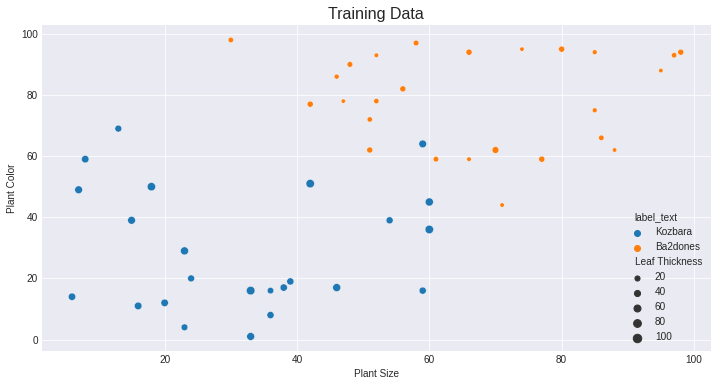

In [269]:
tmp = test.copy()
tmp['label'] = predictions
tmp['label_text'] = tmp['label']
tmp['label_text'][tmp['label'] == 1] = 'Kozbara'
tmp['label_text'][tmp['label'] == 0] = 'Ba2dones'

fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Training Data',{'fontsize':16})
sns.scatterplot(data= tmp, x= 'Plant Size', y= 'Plant Color', hue= 'label_text', size='Leaf Thickness', ax=ax)
plt.show()

In [270]:
def Evaluate(y_true, y_pred):
    n_correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            n_correct += 1

    acc = n_correct/len(y_true)
    print(acc)


These are your predictions on the test set<br>
do you think your implementation did well?
<br><br>
Now try different values of K and see how that affects your predictions

# Extra Knowledge

One of the problems of KNN is it's longer runtimes for larger datasets.<br><br>
<font size=3>Recall that for each unknown point the KNN algorithm has to pass on all training set calculating distance between the unknown point and each training set data point</font>
<br><br>
For small Datasets (such as the one in this task) this is not a big deal, however for larger datasets this can be a serious problem
<br><br>
In the following cells we verify this by trying to run our implementation on our dataset and on a larger dataset then measuring the runtime of both


In [271]:
# Our Dataset
#data_array, test_array, 5
start = timeit.default_timer()
predictions = run_KNN(data_array, test_array, 5) # fill in the function call
stop = timeit.default_timer()
print('runtime: ', stop - start)  

TypeError: ignored

In [ ]:
# Some large dataset
large_data_train = np.array(pd.read_csv('train_large.csv'))
large_data_test = np.array(pd.read_csv('test_large.csv'))

start = timeit.default_timer()
predictions = run_KNN(large_data_train[:1500], large_data_test, 5) # fill in the function call
stop = timeit.default_timer()
print('runtime: ', stop - start)

Note the difference in the runtime between our dataset and the other dataset although the difference in their size is not that large
<br><br>
Our dataset:<br>
<p>&emsp; Train:<br>
  &emsp;&emsp; • Rows : 200&emsp;• Columns : 3<br>
  &emsp;Test:<br>
  &emsp;&emsp;• Rows : 50&emsp;• Columns : 3</p>
<br>
<p>The other dataset:<br>
 &emsp;Train:<br>
 &emsp;&emsp;• Rows : 1500&emsp;• Columns : 3<br>
 &emsp;Test:<br>
   &emsp;&emsp;• Rows : 1000&emsp;• Columns : 3</p>

#Wrapping Up
• KNN is one of the simplest algorithms in ML, it relys on the idea that close points would usually be of the same type.
<br><br>
• By Implementing the KNN from scratch you've not only learned the inner details of the algorithm, you've also increased your experience in Python's <i>loops</i>, <i>functions</i> and <i>Libraries Built-In Functions</i>.
<br><br>
• You've Also learned that due to KNN's high runtime you should pay attention to the dataset size before deciding to use it
<br><br><br>
Finally we hope you enjoyed this week's task and look further to next ones.
<br>

---
<center>
<font size=4, face='helvetica'>ML Committee</font><br>
<font size=5, color='#ffb71c'>S</font><font size=4, face='helvetica'>upport ASU </font></center>